#What is ML? (Black box and white box approach)

Decision Tree (Black Box) Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

SVM (Black Box) Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

k-NN (Black Box) Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       

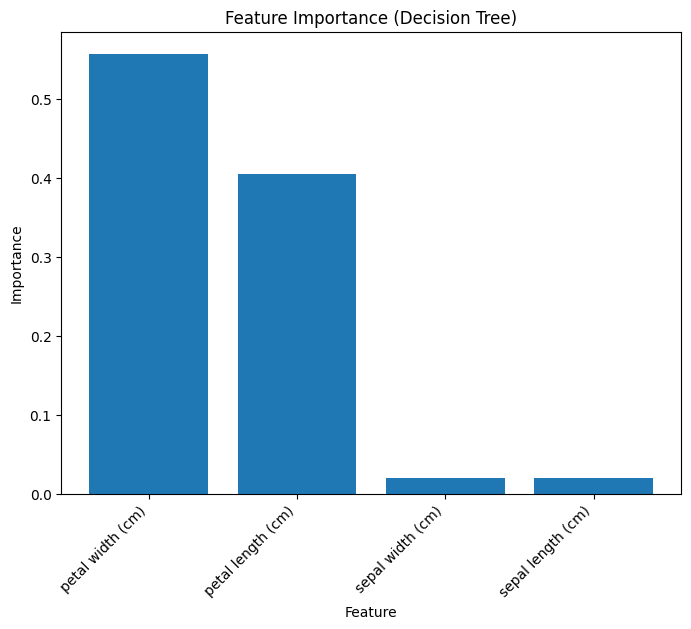

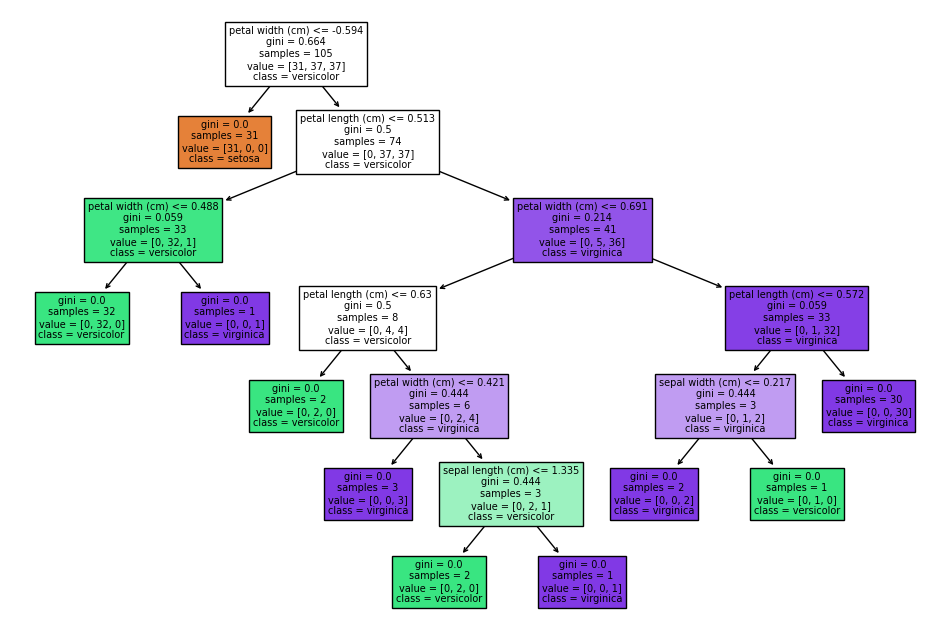

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM and k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Black Box Approach: Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} (Black Box) Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# White Box Approach: Decision Tree (interpretable model)
white_box_model = DecisionTreeClassifier()
white_box_model.fit(X_train_scaled, y_train)

# Feature importance for Decision Tree
feature_importance = white_box_model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
feature_names = iris.feature_names

plt.figure(figsize=(8, 6))
plt.title("Feature Importance (Decision Tree)")
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Visualize Decision Tree (white box model)
plt.figure(figsize=(12, 8))
plot_tree(white_box_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

#Statistical Learning Theory

#Binary classification

Logistic Regression Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



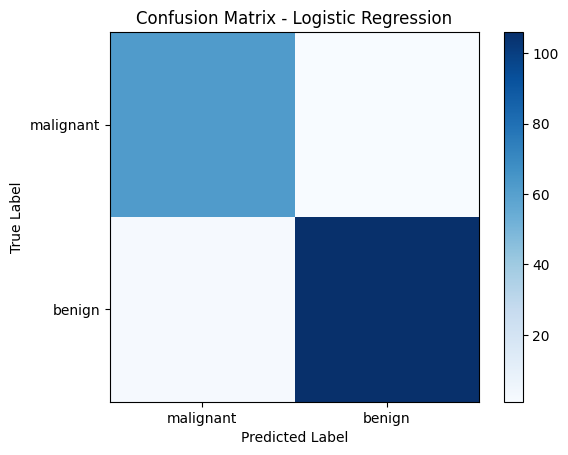

Support Vector Machine Accuracy: 0.9766
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



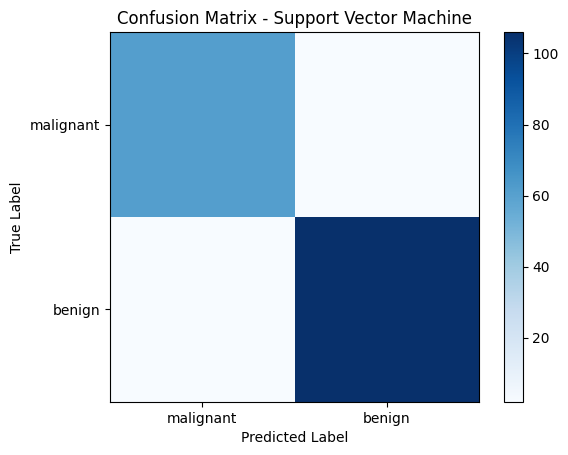

Decision Tree Accuracy: 0.9240
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        63
           1       0.97      0.91      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



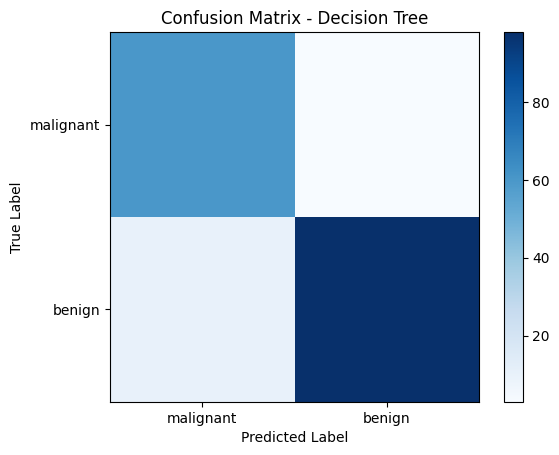

Random Forest Accuracy: 0.9708
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



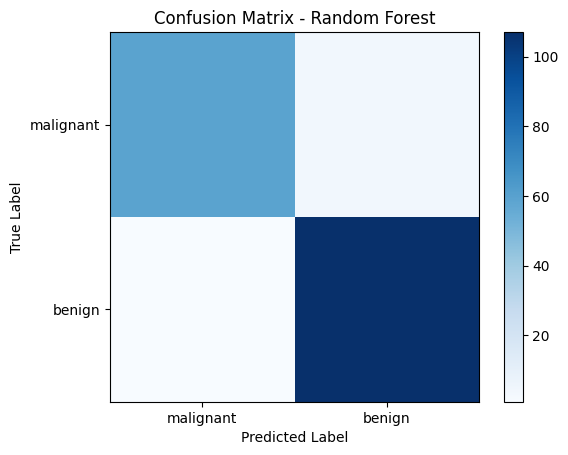

Gradient Boosting Accuracy: 0.9591
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



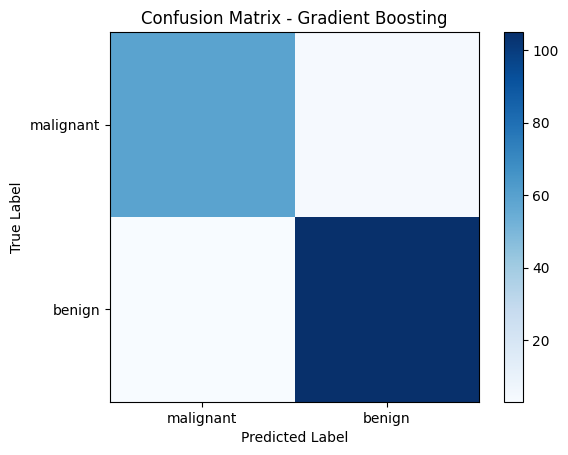

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.colorbar()
    plt.xticks([0, 1], data.target_names)
    plt.yticks([0, 1], data.target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

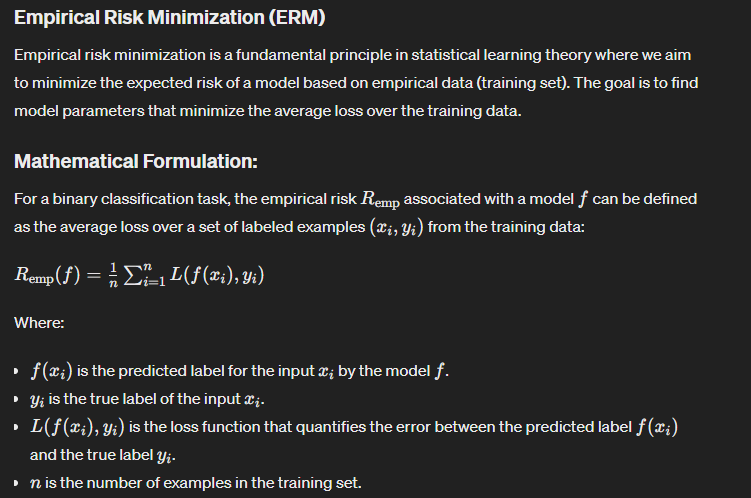

Logistic Regression Empirical Risk: 0.0575
Logistic Regression Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



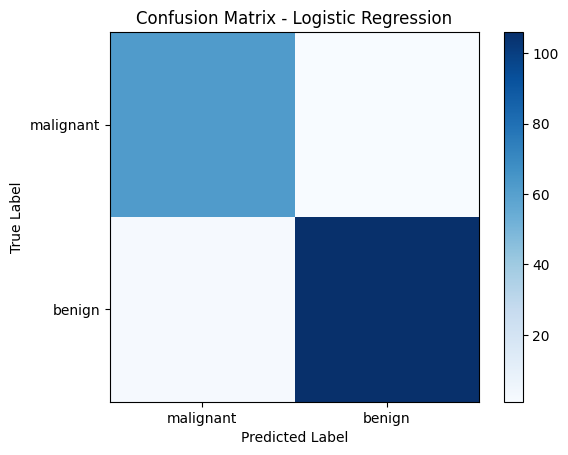

Support Vector Machine Empirical Risk: 0.0698
Support Vector Machine Accuracy: 0.9766
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



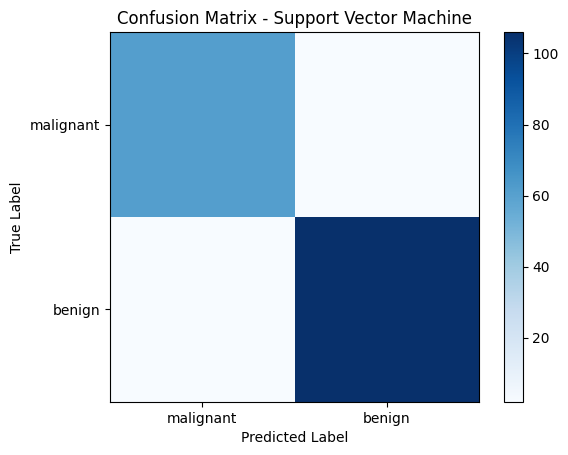

Decision Tree Empirical Risk: 0.0000
Decision Tree Accuracy: 0.9298
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        63
           1       0.96      0.93      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



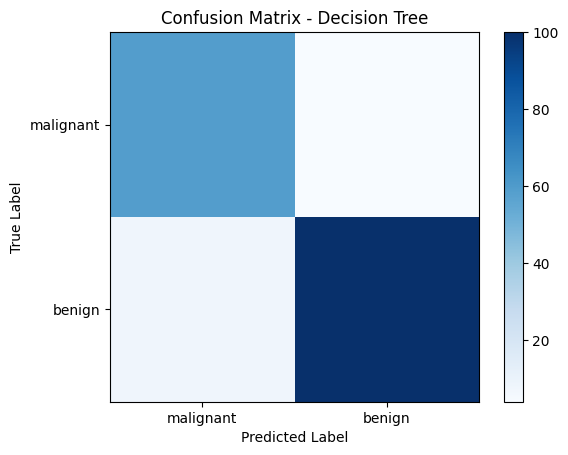

Random Forest Empirical Risk: 0.0337
Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



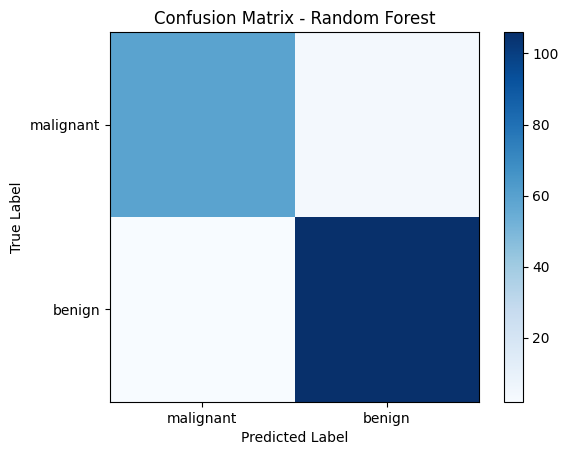

Gradient Boosting Empirical Risk: 0.0018
Gradient Boosting Accuracy: 0.9591
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



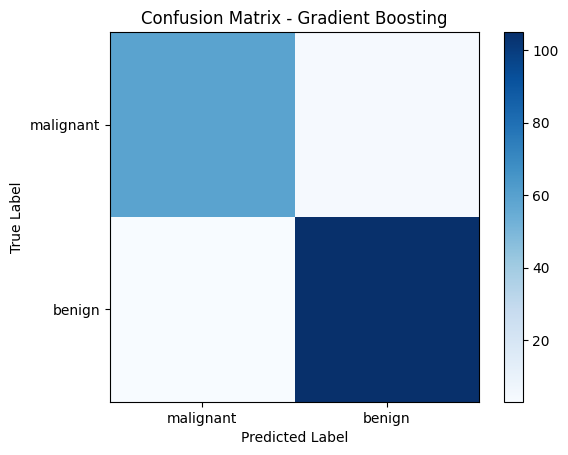

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define loss function for logistic regression (log loss)
def logistic_loss(y_true, y_pred):
    return log_loss(y_true, y_pred)

# Dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict probabilities on the training set
    y_train_pred_proba = clf.predict_proba(X_train_scaled)[:, 1]  # Probability of positive class

    # Calculate empirical risk (average loss)
    emp_risk = logistic_loss(y_train, y_train_pred_proba)
    print(f"{name} Empirical Risk: {emp_risk:.4f}")

    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.colorbar()
    plt.xticks([0, 1], data.target_names)
    plt.yticks([0, 1], data.target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


#Generative vs discriminative approaches

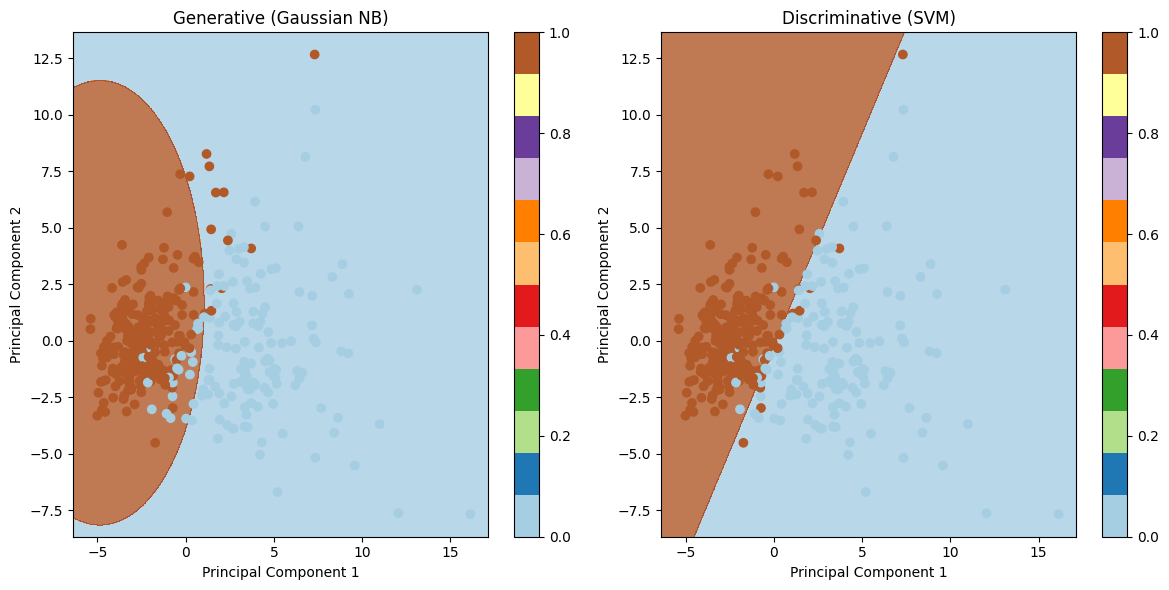

Generative (Gaussian NB) Accuracy: 0.9181
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.93      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



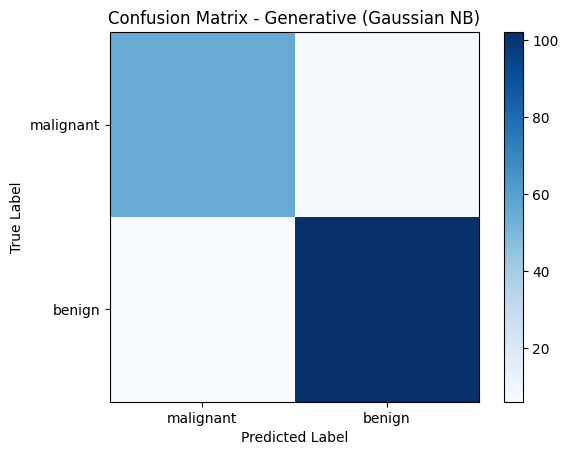

Discriminative (SVM) Accuracy: 0.9766
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



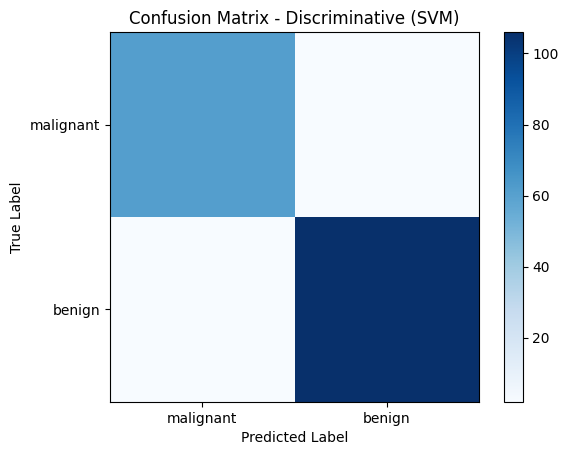

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Generative Model: Gaussian Naive Bayes with PCA-transformed data
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)  # Train with PCA-transformed training data

# Discriminative Model: Support Vector Machine (SVM) with original scaled data
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)  # Train with original scaled training data

# Evaluate models
models = {
    "Generative (Gaussian NB)": gnb,
    "Discriminative (SVM)": svm
}

# Plot decision boundaries using PCA components
plt.figure(figsize=(12, 6))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 2, i + 1)
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Create a meshgrid of PCA-transformed data for prediction
    mesh_data = np.c_[xx.ravel(), yy.ravel()]

    if name == "Generative (Gaussian NB)":
        Z = model.predict(mesh_data)  # Predict with PCA-transformed mesh data
    else:
        # Apply PCA transformation to the meshgrid before prediction
        mesh_data_scaled = pca.inverse_transform(mesh_data)
        Z = model.predict(mesh_data_scaled)  # Predict with original scaled mesh data

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(name)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.colorbar()

plt.tight_layout()
plt.show()

# Evaluate performance on test set
for name, model in models.items():
    if name == "Generative (Gaussian NB)":
        y_pred = model.predict(X_test_pca)  # Predict with PCA-transformed test data
    else:
        y_pred = model.predict(X_test_scaled)  # Predict with original scaled test data

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.colorbar()
    plt.xticks([0, 1], data.target_names)
    plt.yticks([0, 1], data.target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


#Estimation vs. approximation


Accuracy: 0.9825
AUC Score: 0.9979


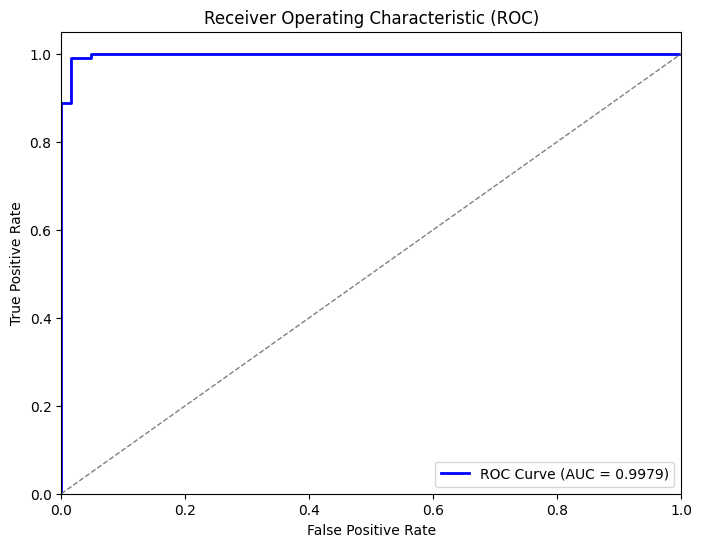

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prediction using 'predict'
y_pred = model.predict(X_test_scaled)

# Prediction using 'predict_proba'
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (malignant)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()